In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon

# Choropleth Map Demo
## UFO Sightings in the US

In [4]:
ufos = pd.read_csv("data/ufo_sightings_scrubbed.csv", low_memory = False)
ufos = ufos[["datetime", "country", "state", "latitude", "longitude "]]
ufos.columns = ["datetime", "country", "state", "latitude", "longitude"]
ufos = ufos[ufos.country == "us"]

In [5]:
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,tx,29.8830556,-97.941111
3,10/10/1956 21:00,us,tx,28.9783333,-96.645833
4,10/10/1960 20:00,us,hi,21.4180556,-157.803611
5,10/10/1961 19:00,us,tn,36.5950000,-82.188889
7,10/10/1965 23:45,us,ct,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,tn,36.1658333,-86.784444
80328,9/9/2013 22:00,us,id,43.6136111,-116.202500
80329,9/9/2013 22:00,us,ca,38.2972222,-122.284444
80330,9/9/2013 22:20,us,va,38.9011111,-77.265556


In [6]:
state_names = pd.read_csv("data/states.csv")
state_names.abbreviation = state_names.abbreviation.str.lower()
state_names_dict = {state.abbreviation: state["name"] for index, state in state_names.iterrows()}
ufos.state.replace(state_names_dict, inplace = True)

In [7]:
ufos

,datetime,country,state,latitude,longitude
0,10/10/1949 20:30,us,Texas,29.8830556,-97.941111
3,10/10/1956 21:00,us,Texas,28.9783333,-96.645833
4,10/10/1960 20:00,us,Hawaii,21.4180556,-157.803611
5,10/10/1961 19:00,us,Tennessee,36.5950000,-82.188889
7,10/10/1965 23:45,us,Connecticut,41.1175000,-73.408333
...,...,...,...,...,...
80327,9/9/2013 21:15,us,Tennessee,36.1658333,-86.784444
80328,9/9/2013 22:00,us,Idaho,43.6136111,-116.202500
80329,9/9/2013 22:00,us,California,38.2972222,-122.284444
80330,9/9/2013 22:20,us,Virginia,38.9011111,-77.265556


In [8]:
num_sightings_by_state = ufos.groupby("state").size()

In [9]:
num_sightings_by_state

state
Alabama                  642
Alaska                   319
Arizona                 2414
Arkansas                 588
California              8912
Colorado                1413
Connecticut              892
Delaware                 166
District of Columbia       7
Florida                 3835
Georgia                 1255
Hawaii                   262
Idaho                    521
Illinois                2499
Indiana                 1288
Iowa                     678
Kansas                   613
Kentucky                 855
Louisiana                558
Maine                    558
Maryland                 837
Massachusetts           1256
Michigan                1836
Minnesota               1012
Mississippi              375
Missouri                1458
Montana                  478
Nebraska                 381
Nevada                   803
New Hampshire            486
New Jersey              1255
New Mexico               720
New York                2980
North Carolina          1740
North Da

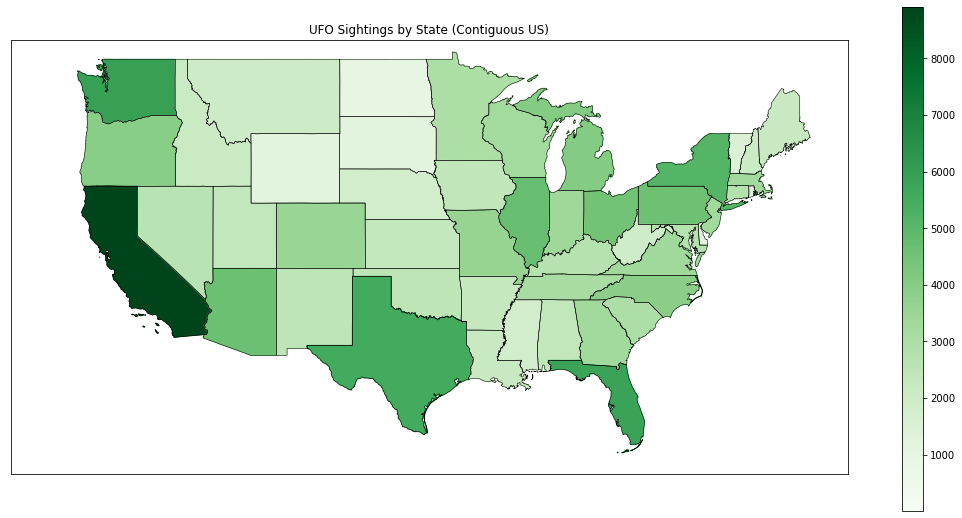

In [13]:
fig = plt.figure(figsize = (15, 10))
m = Basemap(projection = "merc", llcrnrlon = -130, llcrnrlat = 23, urcrnrlon = -64, urcrnrlat = 50)
us_info = m.readshapefile("data/st99_d00", "states", drawbounds = True)
colors = {}
state_names = []
cmap = plt.cm.Greens
vmin = num_sightings_by_state.min()
vmax = num_sightings_by_state.max()
for shape_dict in m.states_info:
    state_name = shape_dict["NAME"]
    # Skip DC and Puerto Rico
    if state_name not in ["District of Columbia", "Puerto Rico"]:
        sightings = num_sightings_by_state[num_sightings_by_state.index == state_name][0]
        colors[state_name] = cmap(np.sqrt((sightings - vmin) / (vmax - vmin)))[:3]
    state_names.append(state_name)
ax = plt.gca()
for nshape, seg in enumerate(m.states):
  # Skip DC and Puerto Rico
  if state_names[nshape] not in ["District of Columbia", "Puerto Rico"]:
    color = rgb2hex(colors[state_names[nshape]])
    poly = Polygon(seg, facecolor = color, edgecolor = color)
    ax.add_patch(poly)
plt.title("UFO Sightings by State (Contiguous US)")
colorbar_ax = fig.add_axes([0.95, 0.15, 0.02, 0.7])
matplotlib.colorbar.ColorbarBase(colorbar_ax, cmap = cmap,
  norm = matplotlib.colors.Normalize(vmin, vmax))
plt.show()
